# Statistics of d3d_clear/disrupt_100.txt



In [51]:
from os.path import join
import numpy as np
import h5py
import matplotlib.pyplot as plt

from tqdm import tqdm

import sys
sys.path.append("/home/rkube/repos/frnn-loader")
from frnn_loader.primitives.signal import signal_0d

import pandas as pd

In [62]:
shotlist_clear = "d3d_clear_100.txt"
shotlist_disrupt = "d3d_disrupt_100.txt"
root  = "/projects/FRNN/frnn_loader"
signal_ip = signal_0d("ipspr15V")
skip_shots = [167548, 168439, 168441, 168450, 168484, 168500, 168442, 168443, 168483, 168485, 168486]

In [53]:
my_df = pd.DataFrame(columns=["Disruptive", "tdisrupt"])

In [54]:
for shotlist, ddd in zip([shotlist_clear, shotlist_disrupt], ["clear", "disrupt"]):

    with open(join(root, "..", "shot_lists", shotlist), "r") as fp:
        for line in tqdm(fp.readlines()):
            # Convert shotnr to int and ttd to float
            shotnr, ttd = [trf(val) for trf, val in zip([int, float], line.split())]
            
            if shotnr in skip_shots:
                continue
                
            if ddd == "clear":
                append_df = pd.DataFrame({"Disruptive": False, "tdisrupt": -1.0}, index=[shotnr])
            elif ddd == "disrupt":
                append_df = pd.DataFrame({"Disruptive": True, "tdisrupt": ttd}, index=[shotnr])
                
            my_df = my_df.append(append_df)

100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 903.28it/s]


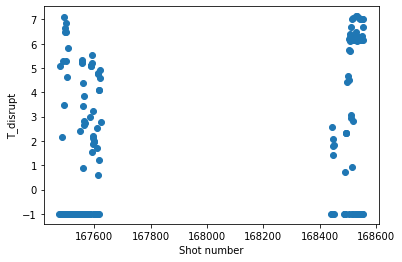

In [56]:
plt.scatter(my_df.index, my_df.tdisrupt)
plt.xlabel("Shot number")
plt.ylabel("T_disrupt")
plt.savefig("shot_vs_tdisrupt.png")

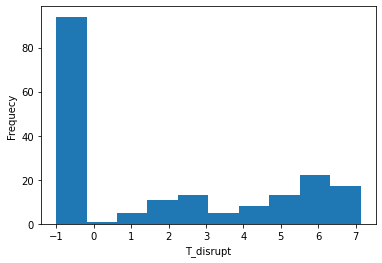

In [57]:
plt.hist(my_df.tdisrupt, bins=10)
plt.xlabel("T_disrupt")
plt.ylabel("Frequecy")
plt.savefig("Tdisrupt_hist.png")

In [32]:
for shotlist, ddd in zip([shotlist_clear, shotlist_disrupt], ["clear", "disrupt"]):

    with open(join(root, "..", "shot_lists", shotlist), "r") as fp:
        for line in tqdm(fp.readlines()):
            # Convert shotnr to int and ttd to float
            shotnr, ttd = [trf(val) for trf, val in zip([int, float], line.split())]
            
            if shotnr in skip_shots:
                continue

            try:
                with h5py.File(join(root, "D3D", f"{shotnr}.h5"), "r") as fp:
                    tb = fp[signal_ip.info["LocalPath"]]["tb"][:]
                    data = fp[signal_ip.info["LocalPath"]]["zdata"][:]
            except:
                continue

            fig = plt.figure()
            ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
            ax.plot(tb, data, label=f"{shotnr}")
            ax.set_xlabel("time [ms]")
            ax.set_ylabel("Ip [MA]")
            ax.set_title(ddd)
            fig.savefig(f"plots/{shotnr}_ip.png")
            plt.close(fig)

100%|███████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.79it/s]


In [59]:
my_df

,Disruptive,tdisrupt
167475,False,-1.0000
167481,False,-1.0000
167482,False,-1.0000
167483,False,-1.0000
167484,False,-1.0000
...,...,...
168549,True,7.0320
168550,True,6.3075
168552,True,7.0195
168553,True,6.1415
